In [18]:
import torch
import torchvision.datasets as datasets
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np

In [3]:
DATA_PATH = "../data/astro_dataset_maxia/astro_dataset_maxia"

In [4]:
for split in ["training", "validation", "test"]:
    split_path = os.path.join(DATA_PATH, split)
    print(f"\n--- {split.upper()} ---")

    for class_name in sorted(os.listdir(split_path)):
        class_path = os.path.join(split_path, class_name)
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} images")


--- TRAINING ---
asteroid: 212 images
black_hole: 185 images
earth: 209 images
galaxy: 185 images
jupiter: 202 images
mars: 215 images
mercury: 201 images
neptune: 202 images
pluto: 201 images
saturn: 201 images
uranus: 202 images
venus: 201 images

--- VALIDATION ---
asteroid: 42 images
black_hole: 48 images
earth: 59 images
galaxy: 49 images
jupiter: 57 images
mars: 61 images
mercury: 57 images
neptune: 57 images
pluto: 57 images
saturn: 57 images
uranus: 57 images
venus: 57 images

--- TEST ---
asteroid: 29 images
black_hole: 31 images
earth: 29 images
galaxy: 30 images
jupiter: 28 images
mars: 30 images
mercury: 28 images
neptune: 28 images
pluto: 28 images
saturn: 28 images
uranus: 28 images
venus: 28 images


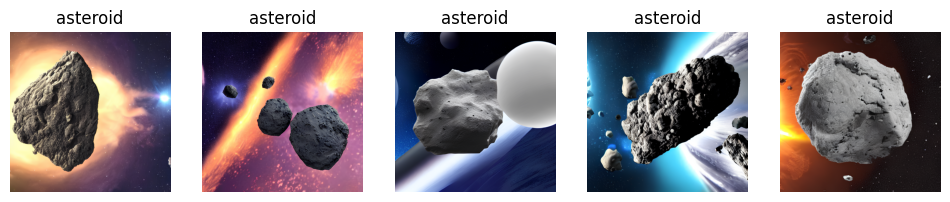

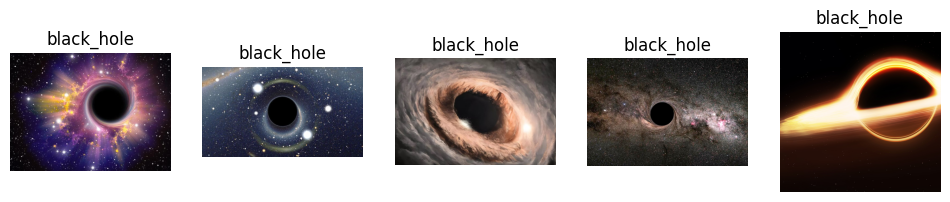

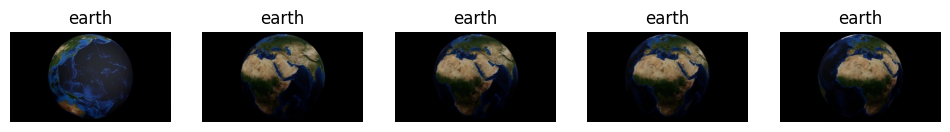

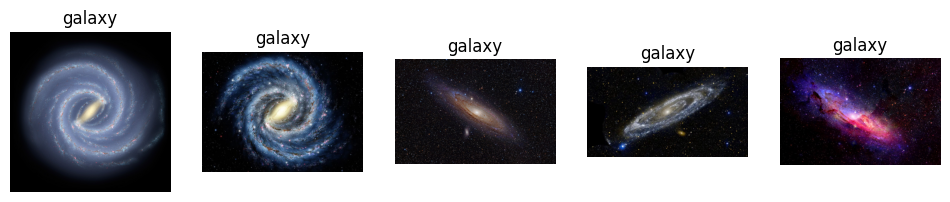

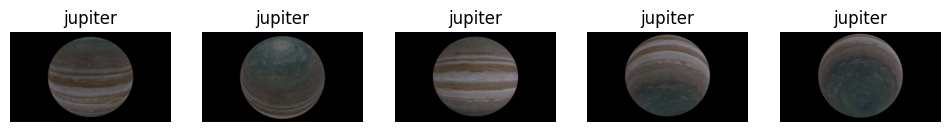

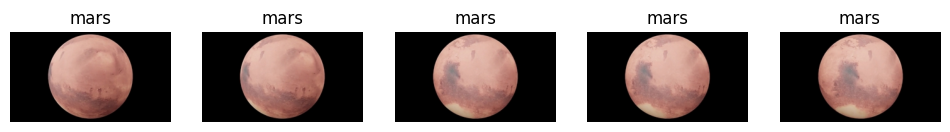

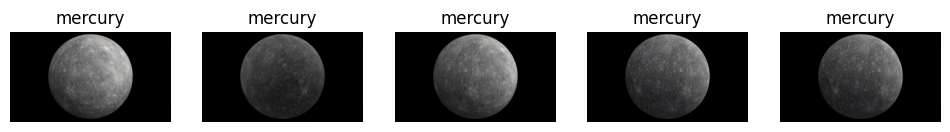

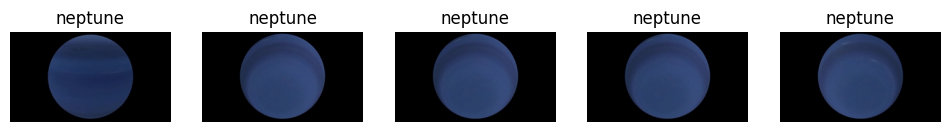

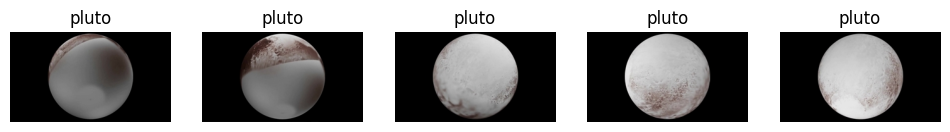

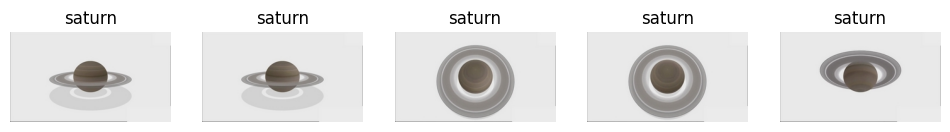

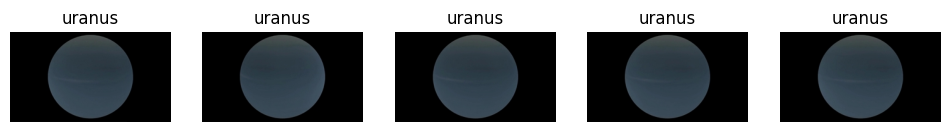

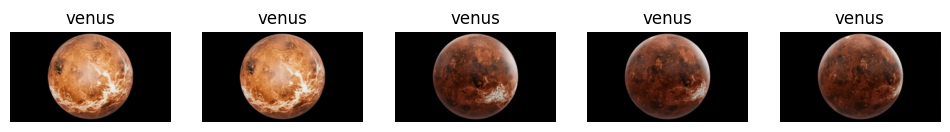

In [ ]:
def show_samples(class_folder, num=5):
    images = os.listdir(class_folder)[:num]
    plt.figure(figsize=(12,4))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(class_folder, img_name))
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_folder.split("\\")[-1])
    plt.show()
split = "training"  
split_path = os.path.join(DATA_PATH, split)

for class_name in sorted(os.listdir(split_path)):
    class_folder = os.path.join(split_path, class_name)
    show_samples(class_folder, num=5)

In [11]:
sizes = Counter()

split_path = os.path.join(DATA_PATH, "training")

for class_name in os.listdir(split_path):
    class_folder = os.path.join(split_path, class_name)
    for img_name in os.listdir(class_folder)[:300]:  # sample 300 images
        img = Image.open(os.path.join(class_folder, img_name))
        sizes[img.size] += 1

print("Unique image sizes:", sizes)

Unique image sizes: Counter({(256, 144): 1352, (2048, 2048): 212, (462, 260): 94, (260, 260): 46, (1200, 675): 32, (390, 260): 30, (347, 260): 19, (463, 260): 16, (1020, 1020): 16, (1024, 1024): 15, (1200, 800): 14, (612, 408): 13, (416, 260): 13, (1200, 1200): 12, (612, 344): 11, (493, 260): 9, (612, 383): 7, (1200, 900): 6, (800, 450): 6, (240, 240): 6, (612, 306): 6, (289, 260): 6, (1024, 576): 5, (1020, 680): 5, (666, 444): 4, (1000, 667): 4, (640, 360): 4, (800, 800): 4, (1200, 750): 4, (220, 220): 4, (250, 250): 4, (404, 260): 4, (402, 260): 4, (520, 260): 4, (612, 612): 4, (1099, 618): 4, (612, 382): 4, (920, 465): 3, (960, 538): 3, (1200, 680): 3, (1217, 694): 3, (1236, 577): 3, (248, 260): 3, (239, 260): 3, (612, 551): 3, (600, 337): 2, (1200, 810): 2, (750, 506): 2, (720, 405): 2, (800, 600): 2, (1216, 804): 2, (862, 485): 2, (1020, 574): 2, (900, 599): 2, (720, 720): 2, (1200, 650): 2, (274, 260): 2, (563, 260): 2, (411, 260): 2, (1200, 788): 2, (800, 669): 2, (870, 489): 2,

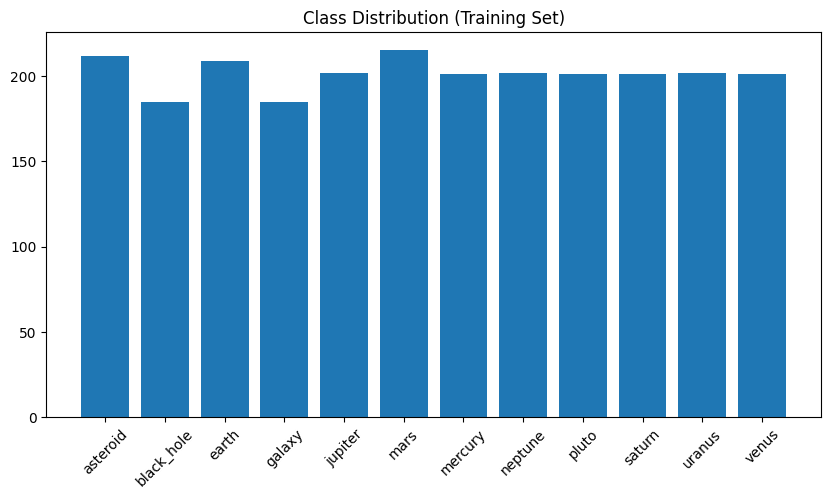

In [15]:

split = "training"
split_path = os.path.join(DATA_PATH, split)

class_counts = {}

for class_name in sorted(os.listdir(split_path)):
    class_counts[class_name] = len(os.listdir(os.path.join(split_path, class_name)))

plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title("Class Distribution (Training Set)")
plt.show()


In [ ]:
#images per class: around 200


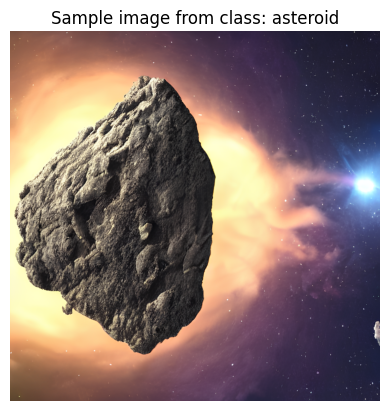

In [16]:
class_name = os.listdir(os.path.join(DATA_PATH, "training"))[0]

# pick first image from that class
img_path = os.path.join(DATA_PATH, "training", class_name, os.listdir(os.path.join(DATA_PATH, "training", class_name))[0])

img = Image.open(img_path)

plt.imshow(img)
plt.title(f"Sample image from class: {class_name}")
plt.axis("off")
plt.show()


In [19]:
img_array = np.array(img)
print("Image shape:", img_array.shape)
print("Pixel matrix preview:")
print(img_array)

Image shape: (2048, 2048, 3)
Pixel matrix preview:
[[[117  81  66]
  [120  82  67]
  [120  81  66]
  ...
  [ 31  27  49]
  [ 30  27  48]
  [ 30  26  48]]

 [[116  78  64]
  [119  81  67]
  [118  80  64]
  ...
  [ 30  27  47]
  [ 30  27  47]
  [ 29  26  47]]

 [[119  82  68]
  [119  81  67]
  [119  81  66]
  ...
  [ 29  26  46]
  [ 30  27  47]
  [ 29  26  46]]

 ...

 [[ 88  66  45]
  [ 89  67  47]
  [ 90  68  47]
  ...
  [ 36  33  60]
  [ 36  35  61]
  [ 38  36  61]]

 [[ 89  68  47]
  [ 90  68  48]
  [ 90  68  48]
  ...
  [ 37  34  61]
  [ 39  37  64]
  [ 41  39  66]]

 [[ 90  68  48]
  [ 89  68  47]
  [ 89  67  46]
  ...
  [ 37  34  61]
  [ 40  38  64]
  [ 41  40  65]]]


In [23]:


TRAIN_PATH = os.path.join(DATA_PATH, "training")

widths = []
heights = []

for class_name in os.listdir(TRAIN_PATH):
    class_folder = os.path.join(TRAIN_PATH, class_name)

    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)

        try:
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
        except:
            pass  

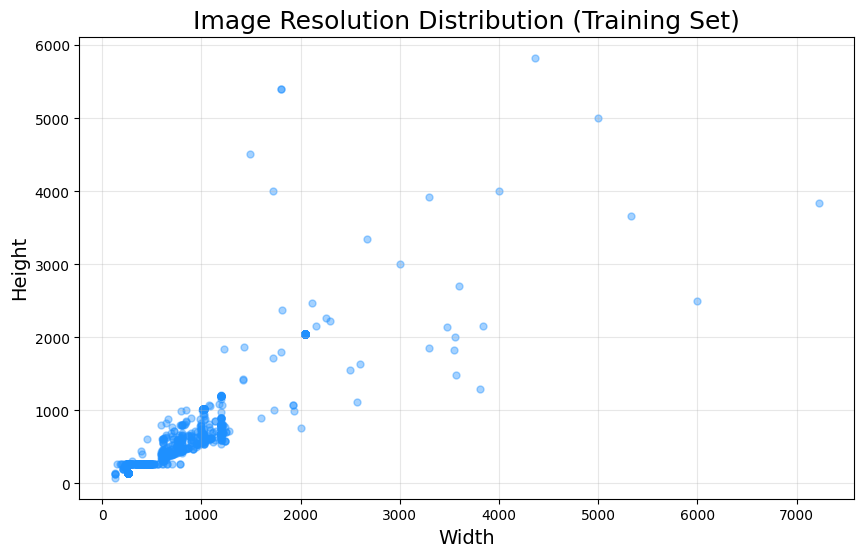

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(widths, heights, alpha=0.4, s=25, color='dodgerblue')
plt.title("Image Resolution Distribution (Training Set)", fontsize=18)
plt.xlabel("Width", fontsize=14)
plt.ylabel("Height", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


In [25]:

sizes = list(zip(widths, heights))
top_sizes = Counter(sizes).most_common(3)
print("Most common sizes:", top_sizes)

Most common sizes: [((256, 144), 1352), ((2048, 2048), 212), ((462, 260), 94)]
